<a href="https://colab.research.google.com/github/fatima2112/gaiaXpy/blob/main/Calibrate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install GaiaXPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.0/812.0 KB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.5/131.5 KB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 82.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 885.7/885.7 KB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.4/361.4 KB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 51.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

data = pd.read_csv("gdrive/MyDrive/calibrate/XP_CONTINUOUS-Gaia DR3 308866701872125568.csv")
data.head()

MessageError: ignored

In [ ]:
# Import the tool
from gaiaxpy import calibrate
# Path to file with XP CONTINUOUS RAW data (csv, ecsv, fits, or xml)

f = data

In [ ]:
calibrated_spectra, sampling = calibrate(f)
calibrated_spectra

source_id                                               flux  \
0  308866701872125568  [1.8545887904429264e-14, 1.9515631422050145e-1...   

                                          flux_error  
0  [5.214474777878777e-15, 3.992541487358003e-15,...

In [ ]:
calibrated_spectra, sampling = calibrate(f)
sampling

array([ 336.,  338.,  340.,  342.,  344.,  346.,  348.,  350.,  352.,
        354.,  356.,  358.,  360.,  362.,  364.,  366.,  368.,  370.,
        372.,  374.,  376.,  378.,  380.,  382.,  384.,  386.,  388.,
        390.,  392.,  394.,  396.,  398.,  400.,  402.,  404.,  406.,
        408.,  410.,  412.,  414.,  416.,  418.,  420.,  422.,  424.,
        426.,  428.,  430.,  432.,  434.,  436.,  438.,  440.,  442.,
        444.,  446.,  448.,  450.,  452.,  454.,  456.,  458.,  460.,
        462.,  464.,  466.,  468.,  470.,  472.,  474.,  476.,  478.,
        480.,  482.,  484.,  486.,  488.,  490.,  492.,  494.,  496.,
        498.,  500.,  502.,  504.,  506.,  508.,  510.,  512.,  514.,
        516.,  518.,  520.,  522.,  524.,  526.,  528.,  530.,  532.,
        534.,  536.,  538.,  540.,  542.,  544.,  546.,  548.,  550.,
        552.,  554.,  556.,  558.,  560.,  562.,  564.,  566.,  568.,
        570.,  572.,  574.,  576.,  578.,  580.,  582.,  584.,  586.,
        588.,  590.,

In [ ]:
import numpy as np
#first_source = df.iloc[[0]] # Select row with index 0
first_spectra, sampling = calibrate(f)
first_spectra_geom, geom_sampling = calibrate(f, sampling=np.geomspace(330,1049.9999999999, 361))



Default sampling


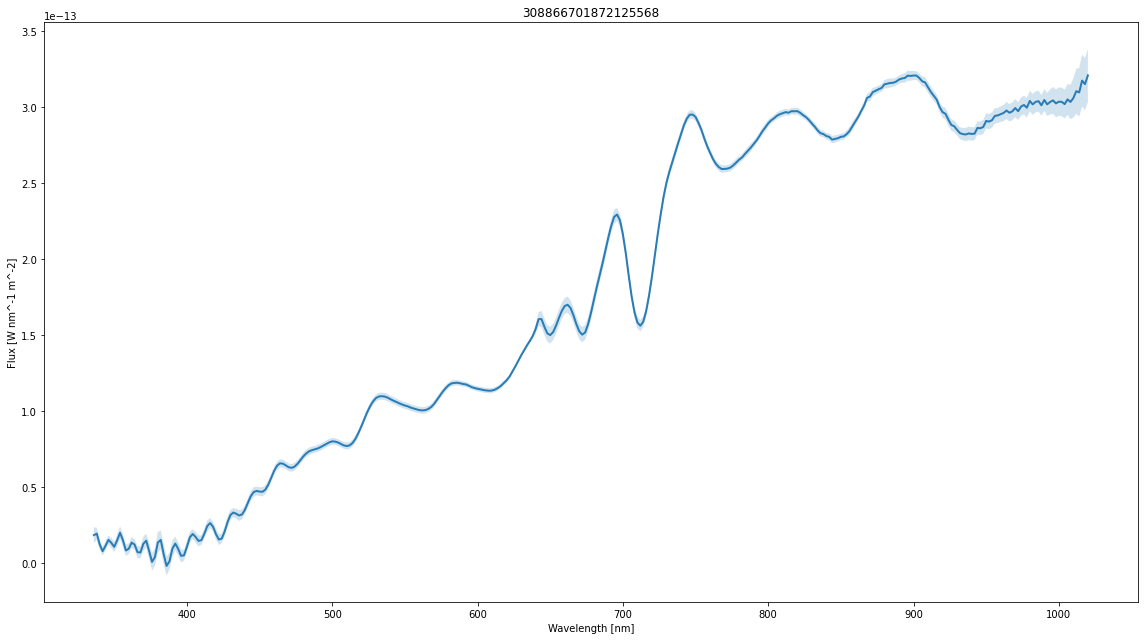

Geometric progression (log) sampling


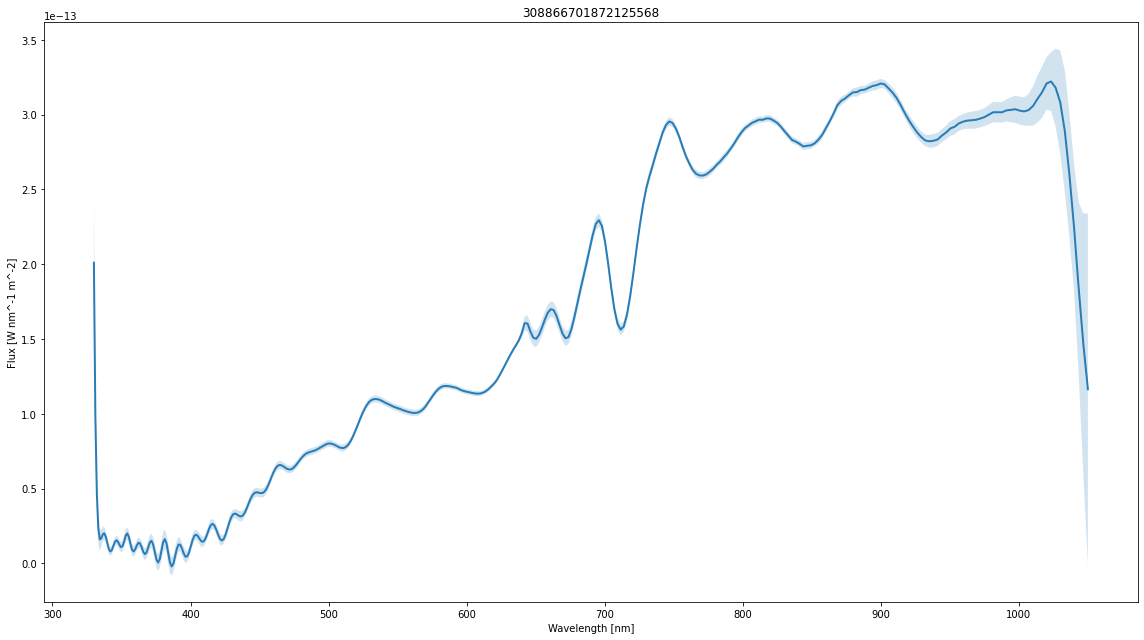

In [ ]:
from gaiaxpy import plot_spectra

print('Default sampling')
# Do not show the legend as there's only one source in the data
plot_spectra(first_spectra, sampling=sampling, legend=False)
print('Geometric progression (log) sampling')
plot_spectra(first_spectra_geom, sampling=geom_sampling, legend=False)

In [ ]:
data2 = pd.read_csv("gdrive/MyDrive/calibrate/XP_CONTINUOUS-Gaia DR3 369176289048301312.csv")

second_source = data2 # We'll use only the second source (sourceId 4) in the demonstration


In [ ]:
non_truncated_spectra, sampling = calibrate(second_source) # truncation is False by default
truncated_spectra, _ = calibrate(second_source, truncation=True)

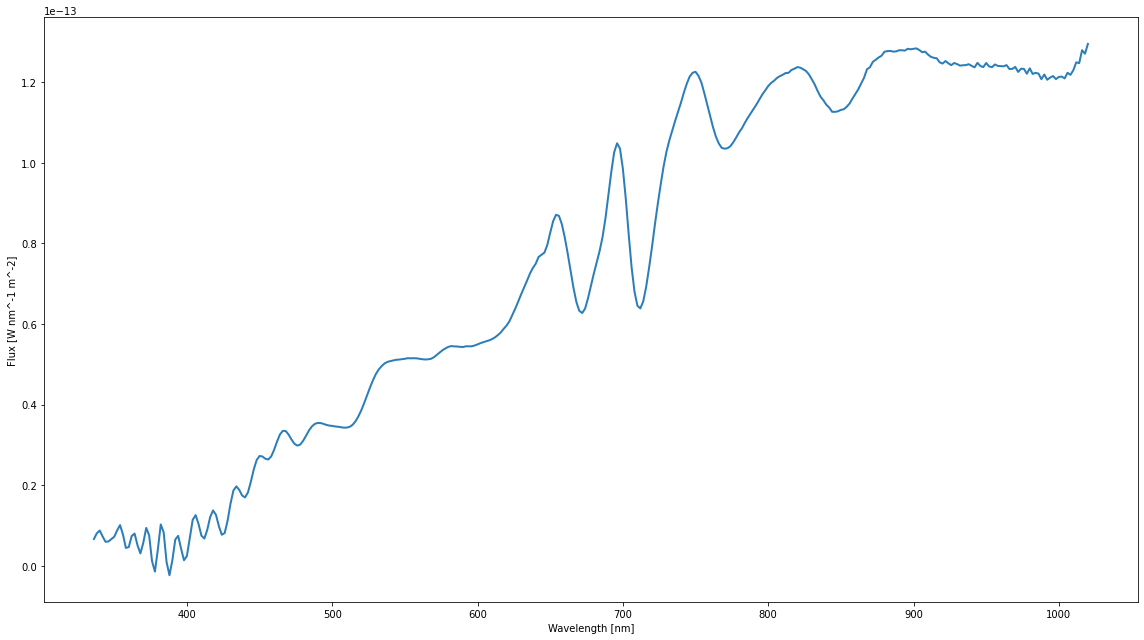

In [ ]:
plot_spectra(non_truncated_spectra, sampling=sampling, multi=True, legend=False)

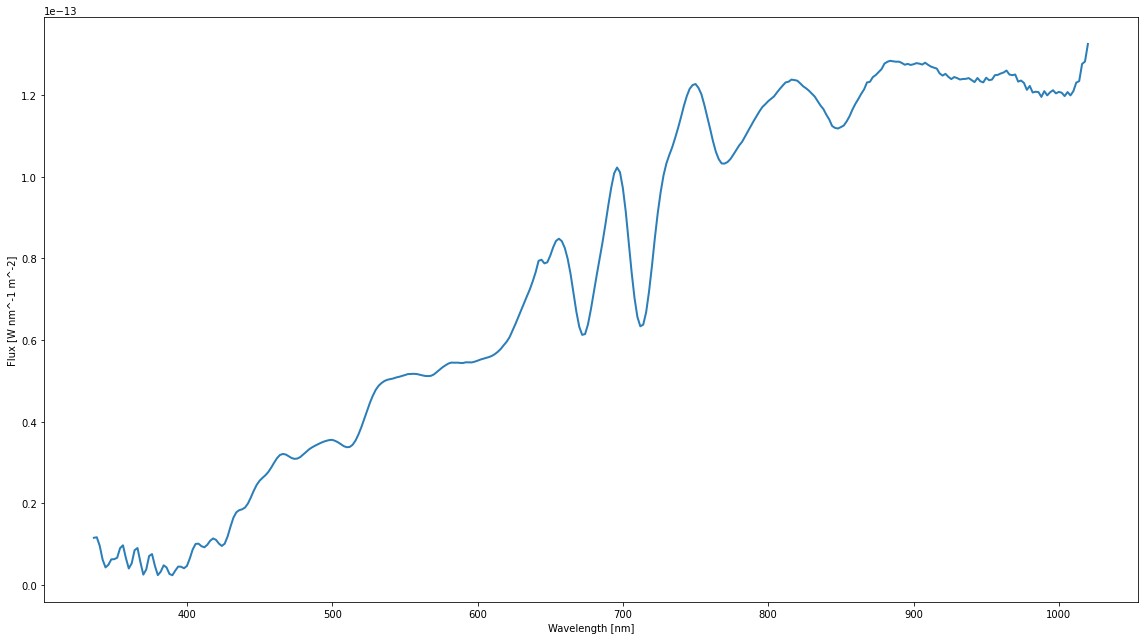

In [ ]:
plot_spectra(truncated_spectra, sampling=sampling, multi=True, legend=False)